# Movement of a robot using velocity commands

In [6]:
# IMPORTS
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output

import sys
sys.path.append("..")
from utils.DrawRobot import DrawRobot
from utils.PlotEllipse import PlotEllipse

In [7]:
def next_pose(x, u, dt, cov=None):
    ''' This function takes pose x and transform it according to the motion u=[v,w]'
        applying the differential drive model.

        Args:
            x: current pose
            u: differential command as a vector [v, w]'
            dt: Time interval in which the movement occurs
            cov: covariance of our movement. If not None, then add gaussian noise
    '''
    if cov is not None:
        u += np.sqrt(cov) @ random.randn(2, 1)

    if u[1] == 0: #linear motion w=0
        next_x = x + np.array([u[0] * np.cos(x[2]) * dt, u[0] * np.sin(x[2]) * dt, 0])
        #next_x = np.vstack([u[0] * np.cos(x[2]) * dt, u[0] * np.sin(x[2]) * dt, 0])
    else: #Non-linear motion w=!0
        R = u[0]/u[1] #v/w=r is the curvature radius
        next_x = x + np.array([-R * np.sin(x[2]) + R * np.sin(x[2] + u[1] * dt),
                               R * np.cos(x[2]) - R * np.cos(x[2] + u[1] * dt),
                               u[1] * dt])
        #next_x = np.vstack([-R * np.sin(x[2]) + R * np.sin(x[2] + u[1] * dt),
                               #R * np.cos(x[2]) - R * np.cos(x[2] + u[1] * dt),
                               #u[1] * dt])

    return next_x

In [8]:
class VelocityRobot(object):
    """ Mobile robot implementation that uses velocity commands.
    
        Attr:
            pose: expected pose of the robot in the real world (without taking account noise)
            dt: Duration of each step in seconds
    """    
    def __init__(self, mean, dt):
        self.pose = mean
        self.dt = dt
        
    def step(self, u):
        self.pose = next_pose(self.pose, u, self.dt)
        
    def draw(self, fig, ax):
        DrawRobot(fig, ax, self.pose)
        

# TEST ROBOT

In [9]:
def main(robot, nSteps):
          
    v = 1 # Linear Velocity 
    l = 0.5 #Half the width of the robot
        
    # MATPLOTLIB
    fig, ax = plt.subplots()
    plt.ion()
    fig.canvas.draw()
    plt.xlim((-2, 20))
    plt.ylim((-2, 30))
    
    plt.fill((7.5, 7.5, 16, 16, 20, 20), (-2, 7.5, 7.5, 20, 20, -2),
            facecolor='lightgreen', edgecolor='blue', linewidth=4)
    plt.fill((-3, 0, 0, 7.5, 7.5, -3), (5, 5, 17.5, 17.5, 32, 32),
            facecolor='lightgreen', edgecolor='blue', linewidth=4)
    
    plt.grid()
        
    # MAIN LOOP
    for k in range(1, nSteps + 1):
        #control is a wiggle with constant linear velocity
        u = np.vstack((v, np.pi / 10 * np.sin(4 * np.pi * k/nSteps)))
        
        robot.step(u)   
        
        #draw occasionally
        if (k-1)%20 == 0:
            robot.draw(fig, ax)
            clear_output(wait=True)
            display(fig)
            time.sleep(0.1)
            
            plt.close()


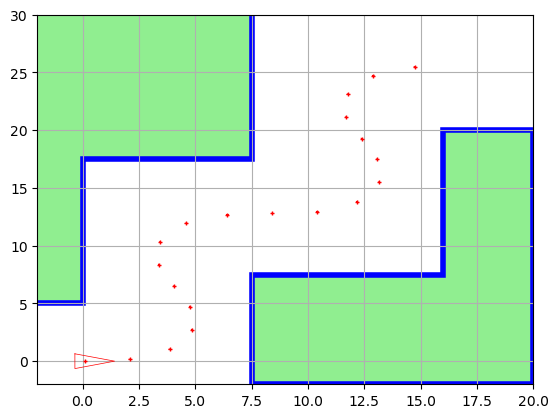

In [10]:
# RUN 
dT = 0.1 # time steps size
pose = np.vstack([0., 0., 0.])

robot = VelocityRobot(pose, dT)
main(robot, nSteps=400)